In [100]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.patches as patches

# Kfold stuff
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, log_loss, make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

# For optimizing hyper parameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization

# For selecting features
import shap

# For creating loading bars and measuring time
from tqdm.notebook import tqdm
import time

# Statistical distributions
from scipy import stats

# Read the data

In [2]:
import h5py
import pandas

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pd.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')

In [3]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


In [5]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

In [6]:
# Train sample
X_unscaled = train[all_variables]
y_truth = train['Truth']
y_energy = train['p_truth_E']

# Test sample
X_test_unscaled = test[all_variables]

print (f'Shape of X: {X_unscaled.shape}')
print (f'Shape of y_truth: {y_truth.shape}')
print (f'Shape of y_energy: {y_energy.shape}')
print (f'Shape of X_test: {X_test_unscaled.shape}')

Shape of X: (162500, 160)
Shape of y_truth: (162500,)
Shape of y_energy: (162500,)
Shape of X_test: (160651, 160)


# Scale the data

In [7]:
#X = preprocessing.normalize(X_unscaled, norm='l2', axis=0)
scaler = preprocessing.RobustScaler().fit(X_unscaled)
X = scaler.transform(X_unscaled)

# Scale test sample
X_test = scaler.transform(X_test_unscaled)

# Select 25 most important physical parameters

In [9]:
# Get train and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y_truth, test_size=0.2, random_state=1)

In [10]:
# First we need to define a model, we will use standard parameters for the MLPClassifier
model = MLPClassifier(random_state=1, max_iter=20000, n_iter_no_change=100, solver='adam',
                      activation='logistic', hidden_layer_sizes=(10, 10), learning_rate='invscaling')

# Fit model to data
model.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10),
              learning_rate='invscaling', max_iter=20000, n_iter_no_change=100,
              random_state=1)

  0%|          | 0/100 [00:00<?, ?it/s]

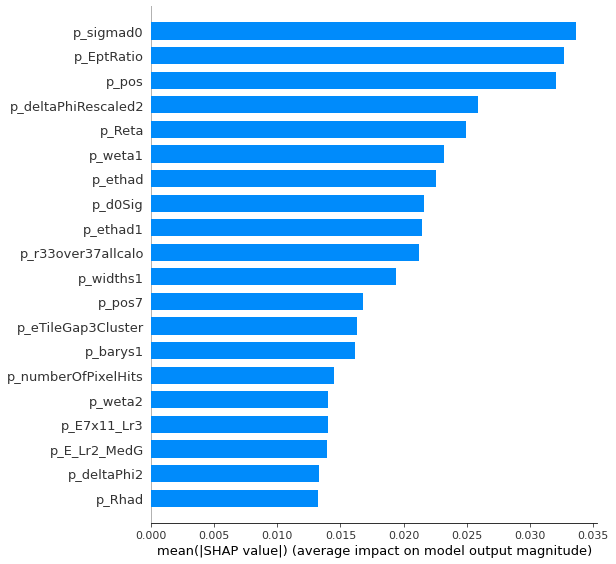

In [20]:
# Run SHAP
explainer = shap.KernelExplainer(model.predict, X_train[:100])
shap_values = explainer.shap_values(X_val[:100])

# Plot them
shap.summary_plot(shap_values, X_val, plot_type="bar", feature_names=all_variables)

In [22]:
# Get variable nammes out
# Get mean shap values
mean_shap = np.mean(abs(shap_values), axis=0)
sort_idx = np.argsort(mean_shap)
sort_shap = mean_shap[sort_idx][-25:][::-1]
sort_shap_var = np.array(all_variables)[sort_idx][-25:][::-1]

# Display the values
shap_val25 = pd.Series( (sort_shap), index=sort_shap_var  )
display(shap_val25)

p_sigmad0              0.033652
p_EptRatio             0.032685
p_pos                  0.032097
p_deltaPhiRescaled2    0.025908
p_Reta                 0.024935
p_weta1                0.023189
p_ethad                0.022545
p_d0Sig                0.021645
p_ethad1               0.021445
p_r33over37allcalo     0.021219
p_widths1              0.019362
p_pos7                 0.016801
p_eTileGap3Cluster     0.016296
p_barys1               0.016161
p_numberOfPixelHits    0.014507
p_weta2                0.014003
p_E7x11_Lr3            0.013999
p_E_Lr2_MedG           0.013958
p_deltaPhi2            0.013321
p_Rhad                 0.013184
p_Eratio               0.012593
p_TRTPID               0.012094
p_poscs1               0.012014
p_R12                  0.011736
p_E3x5_Lr0             0.011711
dtype: float64

Now let's choose how many parameters we will include in the model. There are different things to consider here: how well the model performs, here measured with the Loss MAE, and computing time. Lets look into this.

In [51]:
# Set how many parameters we will test out
n_params = [5,10,12,15,20,25]

# Empty arrays to store values
accuracy_arr = []
computer_time = []

fpr_arr = []
tpr_arr = []
auc_arr = []

# Make X a pandas dataframe so we can use variable names to slice
df_X = pd.DataFrame((X), columns=all_variables )

# Loop over number of parameters used in a model
for n in tqdm(n_params):
    
    # Make a new X (input data containing 20 best parameters)
    X_temp = df_X[sort_shap_var[:n]]
    
    # Split test data and train data
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_truth, test_size=0.2, random_state=1)
    
    # Train model and time it
    model = MLPClassifier(random_state=1, max_iter=20000, n_iter_no_change=100, solver='adam',
                      activation='logistic', hidden_layer_sizes=(10, 10), learning_rate='invscaling')
    t0 = time.process_time()
    model.fit(X_train, y_train)
    t = time.process_time() - t0
    computer_time.append(t)
    
    # Get accuracy
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_arr.append(accuracy)
    
    # Get fpr, tpr and auc score
    predictions = model.predict_proba(X_val) # find prediction that a particle belongs to each class ndarray
    predictions = pd.DataFrame(predictions)
    predictions.columns = ['not_electron', 'electron']
    fpr, tpr, _ = roc_curve(y_val, predictions['electron'])
    fpr_arr.append(fpr)
    tpr_arr.append(tpr)
    auc_score = auc(fpr, tpr)
    auc_arr.append(auc_score)

  0%|          | 0/6 [00:00<?, ?it/s]

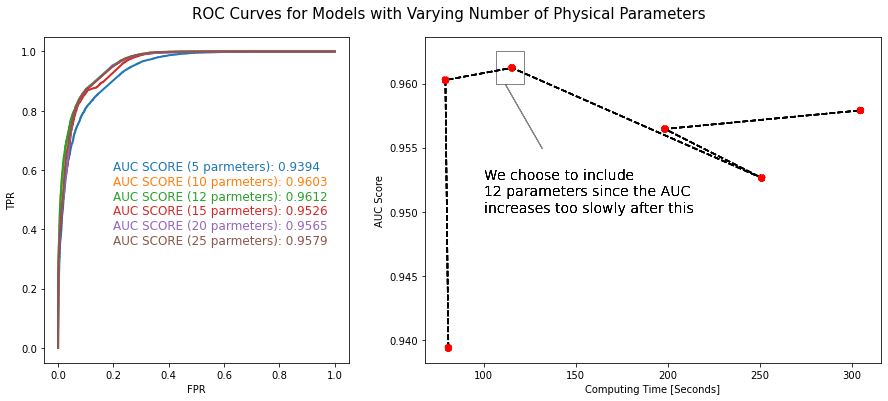

In [60]:
# Plot ROC Curves and AUC vs. Computing times
fig, ax = plt.subplots(ncols=2, figsize=(15,6), gridspec_kw={'width_ratios':(1,1.5)})

for i in range(len(n_params)):
    
    # Plot ROC curve ----------------------------------------------------------------------------------------
    ax[0].plot(fpr_arr[i], tpr_arr[i], label=f'{n_params[i]} parameters', linewidth=2)
    ax[0].set_xlabel('FPR')
    ax[0].set_ylabel('TPR')
    
    # Mark auc scores
    ax[0].text(0.2, 0.6-i/20, f'AUC SCORE ({n_params[i]} parmeters): {auc_arr[i]:.4f}', color=f'C{i}', fontsize=12) 
    
    # Plot AUC vs. Computing time ---------------------------------------------------------------------------
    ax[1].plot(computer_time, auc_arr, color='k', linestyle='dashed', zorder=1)
    ax[1].scatter(computer_time, auc_arr, color='r', linestyle='dashed', zorder=2, s=40)
    ax[1].set_ylabel('AUC Score')
    ax[1].set_xlabel('Computing Time [Seconds]')
    
    # Mark the number of parameters we use
    circle = plt.Rectangle((107, 0.96), 15, 0.0025, color='k', alpha=0.1, fill=False)
    ax[1].add_patch(circle)
    line = plt.arrow(112, 0.9599, 20, -0.005, width=0.000000001, color='k', alpha=0.05)
    ax[1].add_patch(line)
    text = 'We choose to include \n12 parameters since the AUC \nincreases too slowly after this'
    ax[1].text(100, 0.95, text, fontsize=14, weight='light') 
    
fig.suptitle('ROC Curves for Models with Varying Number of Physical Parameters', fontsize=15, y=0.95)
plt.show()

# Finding Hyper Parameters

When attempting a bayesian optimization we have problems with the function not converging, I have therefor instead attempted a grid search, followed up by a random search zoomed in on the area the GridSearch deemed interesting.

In [87]:
# Define parameters we want to investigate
parameters_GridSearch = {"max_iter": [100, 1000, 10000, 30000], 
                         "hidden_layer_sizes": [ (10,1), (100,1), (300,1), (10,10), (100,100)]}    

# Define the model we want to use themm in
model = MLPClassifier(random_state=1, solver='adam', activation='logistic', learning_rate='invscaling')

GridSearch = GridSearchCV(model, 
                          parameters_GridSearch, 
                          cv=5, 
                          return_train_score=True, 
                          refit=True, 
                         )

In [88]:
# Perform GridSearch
GridSearch.fit(X_train, y_train);

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.


In [96]:
# Print results
GridSearch_results = pd.DataFrame(GridSearch.cv_results_)
display(GridSearch_results.head(10))
GridSearch.best_params_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,25.409712,8.486847,0.011018,0.001738,"(10, 1)",100,"{'hidden_layer_sizes': (10, 1), 'max_iter': 100}",0.912000,0.912500,0.914231,...,0.914323,0.002147,16,0.912356,0.917250,0.915087,0.917865,0.916115,0.915735,0.001940
1,24.001445,7.023819,0.009887,0.000534,"(10, 1)",1000,"{'hidden_layer_sizes': (10, 1), 'max_iter': 1000}",0.912000,0.914538,0.914231,...,0.914023,0.001028,17,0.912356,0.918404,0.915087,0.914279,0.916115,0.915248,0.002002
2,21.999021,7.178708,0.008947,0.000822,"(10, 1)",10000,"{'hidden_layer_sizes': (10, 1), 'max_iter': 10...",0.912000,0.914538,0.914231,...,0.914023,0.001028,17,0.912356,0.918404,0.915087,0.914279,0.916115,0.915248,0.002002
3,20.939600,5.686029,0.008566,0.000126,"(10, 1)",30000,"{'hidden_layer_sizes': (10, 1), 'max_iter': 30...",0.912000,0.914538,0.914231,...,0.914023,0.001028,17,0.912356,0.918404,0.915087,0.914279,0.916115,0.915248,0.002002
4,39.605614,7.536928,0.040851,0.002820,"(100, 1)",100,"{'hidden_layer_sizes': (100, 1), 'max_iter': 100}",0.918615,0.918308,0.909962,...,0.915946,0.003136,12,0.925923,0.927029,0.915481,0.921788,0.923029,0.922650,0.004054
5,37.717930,7.127759,0.043678,0.007693,"(100, 1)",1000,"{'hidden_layer_sizes': (100, 1), 'max_iter': 1...",0.916885,0.918308,0.909962,...,0.915600,0.002909,13,0.925058,0.927029,0.915481,0.921788,0.923029,0.922477,0.003927
6,36.532129,4.305460,0.040401,0.001025,"(100, 1)",10000,"{'hidden_layer_sizes': (100, 1), 'max_iter': 1...",0.916885,0.918308,0.909962,...,0.915600,0.002909,13,0.925058,0.927029,0.915481,0.921788,0.923029,0.922477,0.003927
7,36.185374,4.923085,0.039273,0.000586,"(100, 1)",30000,"{'hidden_layer_sizes': (100, 1), 'max_iter': 3...",0.916885,0.918308,0.909962,...,0.915600,0.002909,13,0.925058,0.927029,0.915481,0.921788,0.923029,0.922477,0.003927
8,76.624781,6.662635,0.111987,0.001535,"(300, 1)",100,"{'hidden_layer_sizes': (300, 1), 'max_iter': 100}",0.920385,0.911923,0.910731,...,0.912954,0.007995,20,0.929721,0.924856,0.923356,0.929894,0.909683,0.923502,0.007381
9,85.130978,13.673886,0.116700,0.003500,"(300, 1)",1000,"{'hidden_layer_sizes': (300, 1), 'max_iter': 1...",0.920385,0.916077,0.910731,...,0.917400,0.003919,5,0.929721,0.930644,0.923356,0.929894,0.931010,0.928925,0.002825


{'hidden_layer_sizes': (100, 100), 'max_iter': 1000}

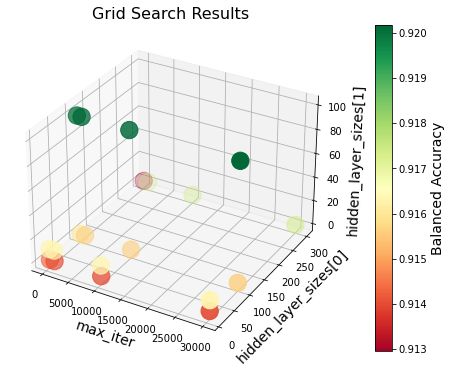

In [172]:
# Lets visualize the gridsearch we just went through

# Create figure
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='3d')

# Get parameters
x1 = GridSearch_results['param_max_iter']
x2 = [GridSearch_results['param_hidden_layer_sizes'][i][0] for i in np.arange(len(GridSearch_results['param_hidden_layer_sizes']))]
x3 = [GridSearch_results['param_hidden_layer_sizes'][i][1] for i in np.arange(len(GridSearch_results['param_hidden_layer_sizes']))]
color = GridSearch_results['mean_test_score']

# Plot grid search
im = ax.scatter(x1, x2, x3, s=300, c = color, cmap='RdYlGn')

ax.set_xlabel('max_iter', fontsize=14)
ax.set_ylabel('hidden_layer_sizes[0]', fontsize=14)
ax.set_zlabel('hidden_layer_sizes[1]', fontsize=14)
ax.set_title('Grid Search Results', fontsize=16)

# Shared colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Balanced Accuracy', fontsize=14, x=1.7)

plt.show()

Not a great plot but you get the point.

In [97]:
# Choose the best parameters for the model later
layers = (100,100)
max_iter = 1000

# Make a final model

Make data set containing the best 12 parameters (we should have done this before the hyperparameter optimization), but I forgot and it takes too long to run for me to be able to do anythin about it before the deadline. So let's just go with it.

In [177]:
# Extract the physical parameters we have chosen in the test set -------------------------

# Make X_test a pandas dataframe so we can use variable names to slice
df_X = pd.DataFrame((X), columns=all_variables )
    
# Make a new X (input data containing 20 best parameters)
X = df_X[sort_shap_var[:12]]

# Make X_test a pandas dataframe so we can use variable names to slice
df_X_test = pd.DataFrame((X_test), columns=all_variables )
    
# Make a new X (input data containing 20 best parameters)
X_test = df_X_test[sort_shap_var[:12]]

In [178]:
# Split into train data and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y_truth, test_size=0.2, random_state=1)

In [179]:
# Set up model
model = MLPClassifier(random_state=1, solver='adam', activation='logistic', learning_rate='invscaling',
                     max_iter=max_iter, hidden_layer_sizes=layers)

# Train model on train set
model.fit(X_train, y_train)

# Calculate balanced accuracy score
y_pred = model.predict(X_val)
accuracy = balanced_accuracy_score(y_val, y_pred)
print('Balanced accuracy:', accuracy)

# Get predictions
predictions = model.predict_proba(X_val)
predictions = pd.DataFrame(predictions, columns=['not_electron', 'electron'])

# Get fpr and tpr to produce roc_curve
fpr, tpr, _ = roc_curve(y_val, predictions['electron'])
auc_score = auc(fpr, tpr)

Balanced accuracy: 0.8570855146182184


In [180]:
# Evaluate Loss Function on the models
cross_entro = make_scorer(log_loss, eps=1e-10, greater_is_better=False)
loss = cross_val_score(model, X_val, y_val, scoring=cross_entro, cv=5)

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


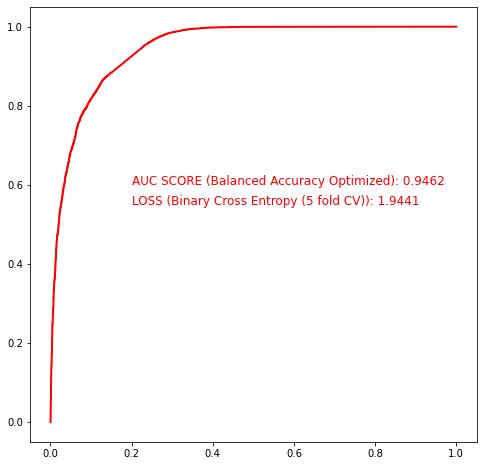

In [181]:
# Plot ROC curve
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(fpr, tpr, color='r', linewidth=2)

# Mark auc scores
ax.text(0.2, 0.6, f'AUC SCORE (Balanced Accuracy Optimized): {auc_score:.4f}', color='r', fontsize=12)
ax.text(0.2, 0.55, f'LOSS (Binary Cross Entropy (5 fold CV)): {-loss.mean():.4f}', color='r', fontsize=12)

plt.show()

# Make predictions on test data and produce csv file

In [192]:
# Extract the physical parameters we have chosen in the test set -------------------------

# Make probability predictions between 0 and 1
# columns are 'not_electron' and 'electron' below: it doesnt matter which one we chose
final_predictions = model.predict_proba(X_test)

# Extract electrons column
final_predictions = pd.DataFrame(final_predictions[:,1], columns=['probability prediction'])

In [193]:
# Make csv file with predictions
file_name = 'Classification_KimiKreilgaard_MLPClassifier.txt'
final_predictions.to_csv('Solutions/'+file_name, sep=',', header=None, index=True, mode='w')

In [194]:
# Make csv file with parameters used
file_name = 'Classification_KimiKreilgaard_MLPClassifier_VariableList.txt'

outfile = open('Solutions/'+file_name, 'w')

for var in sort_shap_var[:12]:
    outfile.write(var+'\n')